In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1
traindata=pd.read_csv('D:/Users/user/Desktop/碩班課程/資料探勘/HW1/train.csv')
testdata=pd.read_csv('D:/Users/user/Desktop/碩班課程/資料探勘/HW1/test.csv')
print(traindata.head())
testdata.head()

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [3]:
#刪除我們不會用到的feature
traindata=traindata.drop(['Descript','Resolution','Address'],axis=1)
testdata=testdata.drop(['Id','Address'],axis=1)
print(traindata.head())
testdata.head()

                 Dates        Category  DayOfWeek PdDistrict           X  \
0  2015-05-13 23:53:00        WARRANTS  Wednesday   NORTHERN -122.425892   
1  2015-05-13 23:53:00  OTHER OFFENSES  Wednesday   NORTHERN -122.425892   
2  2015-05-13 23:33:00  OTHER OFFENSES  Wednesday   NORTHERN -122.424363   
3  2015-05-13 23:30:00   LARCENY/THEFT  Wednesday   NORTHERN -122.426995   
4  2015-05-13 23:30:00   LARCENY/THEFT  Wednesday       PARK -122.438738   

           Y  
0  37.774599  
1  37.774599  
2  37.800414  
3  37.800873  
4  37.771541  


,Dates,DayOfWeek,PdDistrict,X,Y
0,2015-05-10 23:59:00,Sunday,BAYVIEW,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,-122.437394,37.721412


In [4]:
#將預測的label切分出來
label=traindata['Category']
traindata=traindata.drop(['Category'],axis=1)

In [5]:
#2-1
#查看是否有遺漏值需要填補 -> 發現無遺漏值
for col in traindata:
    print(col,sum(traindata[col].isnull()))

Dates 0
DayOfWeek 0
PdDistrict 0
X 0
Y 0


In [6]:
#將train與test合併一起做處理
print(traindata.shape)
print(testdata.shape)
df=pd.concat([traindata,testdata])
print(df.shape)

(878049, 5)
(884262, 5)
(1762311, 5)


In [7]:
#2-2 2-3
#將日期取出小時
df['Dates']=df['Dates'].str[-8:-6]
df.head()

,Dates,DayOfWeek,PdDistrict,X,Y
0,23,Wednesday,NORTHERN,-122.425892,37.774599
1,23,Wednesday,NORTHERN,-122.425892,37.774599
2,23,Wednesday,NORTHERN,-122.424363,37.800414
3,23,Wednesday,NORTHERN,-122.426995,37.800873
4,23,Wednesday,PARK,-122.438738,37.771541


In [8]:
#將 DayOfWeek, PdDistrict, Dates轉換成 Dummies
Onehot=pd.get_dummies(df.loc[:,['DayOfWeek','PdDistrict','Dates']])
df=pd.concat([df,Onehot],axis=1)
df.head()

,Dates,DayOfWeek,PdDistrict,X,Y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,...,Dates_14,Dates_15,Dates_16,Dates_17,Dates_18,Dates_19,Dates_20,Dates_21,Dates_22,Dates_23
0,23,Wednesday,NORTHERN,-122.425892,37.774599,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,23,Wednesday,NORTHERN,-122.425892,37.774599,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,23,Wednesday,NORTHERN,-122.424363,37.800414,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,23,Wednesday,NORTHERN,-122.426995,37.800873,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,23,Wednesday,PARK,-122.438738,37.771541,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


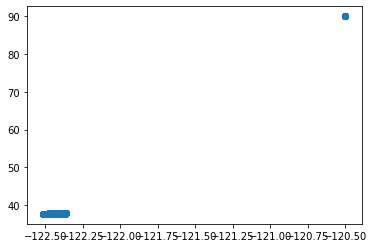

In [9]:
#2-4
#先觀察X,Y的關係
plt.scatter(df['X'],df['Y'])
#發現 X=120.5 Y=90 可能是一個特別的地區

In [10]:
import heapq
print(df['X'].min(),heapq.nlargest(2, df['X'].unique()))
print(df['Y'].min(),heapq.nlargest(2, df['Y'].unique()))

-122.51364206429 [-120.5, -122.364750704393]
37.7078790224135 [90.0, 37.82062083807021]


In [11]:
#將X與Y分成10個類別
xcut=np.append(np.linspace(df['X'].min(),-122.364750704393,10),[-120.5])
ycut=np.append(np.linspace(df['Y'].min(),37.82062083807021,10),[90])
print(pd.cut(df['X'], xcut, include_lowest=True).value_counts())
print(pd.cut(df['Y'], ycut,  include_lowest=True).value_counts())

(-122.414, -122.398]    612097
(-122.431, -122.414]    489698
(-122.447, -122.431]    214097
(-122.398, -122.381]    162360
(-122.464, -122.447]    104191
(-122.481, -122.464]     85228
(-122.497, -122.481]     46607
(-122.515, -122.497]     29873
(-122.381, -122.365]     18017
(-122.365, -120.5]         143
Name: X, dtype: int64
(37.771, 37.783]    455052
(37.783, 37.796]    407034
(37.758, 37.771]    251982
(37.745, 37.758]    150924
(37.72, 37.733]     141903
(37.733, 37.745]    127484
(37.796, 37.808]    115953
(37.707, 37.72]     101896
(37.808, 37.821]      9940
(37.821, 90.0]         143
Name: Y, dtype: int64


In [12]:
df['X']=pd.cut(df['X'], xcut, include_lowest=True)
df['Y']=pd.cut(df['Y'], ycut,  include_lowest=True)

In [13]:
df.head()

,Dates,DayOfWeek,PdDistrict,X,Y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,...,Dates_14,Dates_15,Dates_16,Dates_17,Dates_18,Dates_19,Dates_20,Dates_21,Dates_22,Dates_23
0,23,Wednesday,NORTHERN,"(-122.431, -122.414]","(37.771, 37.783]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,23,Wednesday,NORTHERN,"(-122.431, -122.414]","(37.771, 37.783]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,23,Wednesday,NORTHERN,"(-122.431, -122.414]","(37.796, 37.808]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,23,Wednesday,NORTHERN,"(-122.431, -122.414]","(37.796, 37.808]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,23,Wednesday,PARK,"(-122.447, -122.431]","(37.771, 37.783]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
#將pd的資料型態轉成 str
df['X']=str(df['X'])
df['Y']=str(df['Y'])

In [15]:
#label encoding 
#將 X, Y同時順便把'DayOfWeek','PdDistrict'一起做label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['DayOfWeek','PdDistrict','X','Y']:
        #trian on training data
        le.fit(df[col])
        #transform on training data
        df[col]=le.transform(df[col])
        #或者可以將以上兩段改寫成 df[col]=le.fit_transform(df[col])
df.head()

,Dates,DayOfWeek,PdDistrict,X,Y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,...,Dates_14,Dates_15,Dates_16,Dates_17,Dates_18,Dates_19,Dates_20,Dates_21,Dates_22,Dates_23
0,23,6,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,23,6,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,23,6,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,23,6,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,23,6,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
train_data=df.iloc[0:878049,:]

In [17]:
#2-5 用sklearn的train_test_split將訓練集切成train 跟validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#x_train表示用來train模型的data,y_train表示他的label
x_train, x_test, y_train, y_test = train_test_split(train_data , label, test_size=0.25, random_state=4)

In [22]:
#3 建立 DecisionTreeClassifier，設定參數，並進行預測
clf = DecisionTreeClassifier(max_depth=5,
                            min_samples_split=10000,
                            min_samples_leaf=8000)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8000, min_samples_split=10000,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
y_pred = clf.predict(x_test)

In [24]:
#4 叫出每個類別的precision recall 以及整體的Accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=3))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                             precision    recall  f1-score   support

                      ARSON      0.000     0.000     0.000       364
                    ASSAULT      0.000     0.000     0.000     19226
                 BAD CHECKS      0.000     0.000     0.000        94
                    BRIBERY      0.000     0.000     0.000        77
                   BURGLARY      0.000     0.000     0.000      9210
         DISORDERLY CONDUCT      0.000     0.000     0.000      1072
DRIVING UNDER THE INFLUENCE      0.000     0.000     0.000       569
              DRUG/NARCOTIC      0.238     0.293     0.263     13533
                DRUNKENNESS      0.000     0.000     0.000      1078
               EMBEZZLEMENT      0.000     0.000     0.000       309
                  EXTORTION      0.000     0.000     0.000        66
            FAMILY OFFENSES      0.000     0.000     0.000       103
     FORGERY/COUNTERFEITING      0.000     0.000     0.000      2628
                      FRAUD      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


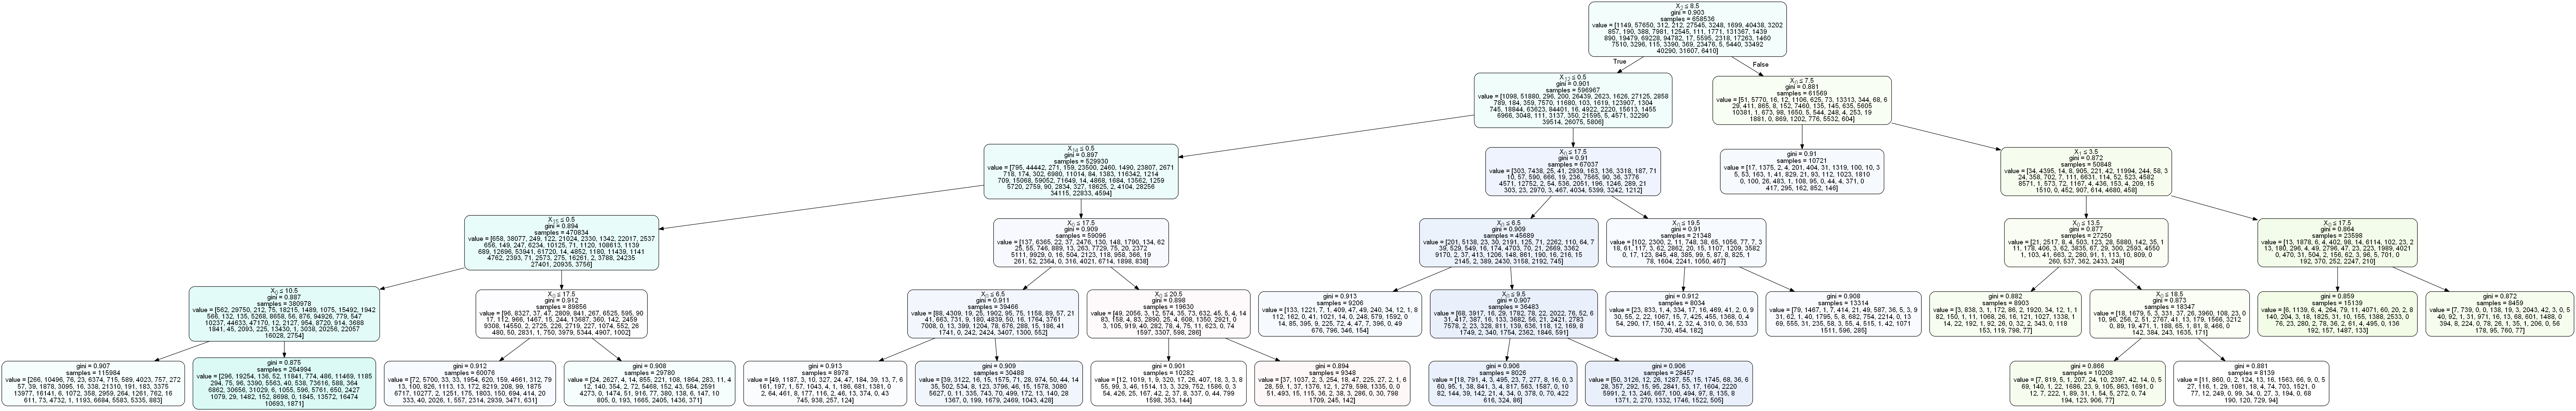

In [25]:
#5 畫出決策樹的圖
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())